### 단순 선형 회귀
- 입력 특성에 대한 선형 함수를 만들어 예측을 하는 알고리즘
- 독립변수가 하나인 경우 특정 직선을 학습하는 것
- 선형 회귀 모델을 잘 한습시키려면 MSE(평균 제곱 오차)값을 최소화 하는 파라미터 선택
- 통계적 방식의 회귀 분석은 정규방정식을 사용하여 문제를 해결
- 머신러닝 모델에서는 경사하강법을 사용하여 위의 문제를 해결

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
data = pd.read_csv('./data/insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


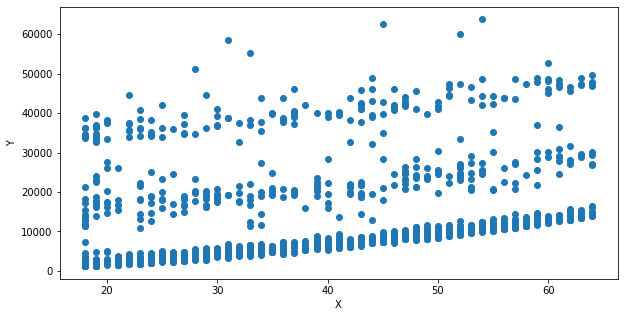

In [4]:
## 나이와 의료비용 사이의 선형임을 확인
x=data['age']
y=data['charges']

plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### LinearRegression()
- 매개변수
    - fit_intercept 
        - 데이터의 타입은 bool 기본값은 True
        - 선형 회귀 모델에 대한 절편을 계산할지 여부 결정
    - normalize 
        - 데이터의 타입은 bool 기본값은 False
        - True인 경우 X는 평균을 빼고 L2-norm으로 나누어 회귀 전에 정규화
        - False인 경우 해당 정규화 X
    - copy_x
        - 데이터의 타입은 bool 기본값은 True
        - True이면 X가 복사
        - False이면 덮어씌운다
    - n_jobs
        - 데이터의 타입은 int 기본값은 None
        - 계산 작업 횟수
    - postive
        - 데이터의 타입은 bool 기본값은 False
        - True로 하면 계수가 양수
- 속성
    - coef_
        - 데이터의 타입은 array
        - 선형 회귀 문제에 대한 추정된 계수
    - rank_
        - 데이터의 타입은 정수
        - 행렬 X의 rank
    - singular_
        - 데이터의 타입은 array
        - 행렬 X의 특이값
    - intercept_
        - 데이터의 타입은 array
        - 선형 모델의 절편
- 메서드 ( [] 안의 인자 값은 생략 가능 )
    - fit(x, y, [smaple_weight])
        - 모델 학습 메서드
        - x : 학습 데이터, 2차원 array형태로 입력
        - y : 타깃데이터
        - sample_weight : 개별 데이터에 대한 가중치
        - 선형 회귀 모델의 추정기를 오브젝트로 반환
    - get_params([deep])
        - 선형 회귀 모델의 매개변수를 출력
        - deep : bool의 형태로 입력, 기본값은 True
        - 값에 매칭되는 파라미터의 이름을 딕셔너리 형태로 반환
    - pridict(x)
        - 선형 모델을 사용해 예측
        - x : 데이터 샘플
        - 예측값을  array로 반환
    - score(x, y, [sample_weight])
        - 예측의 결정 계수를 반환
        - x : 테스트 샘플 array로 입력
        - y : x의 실제 값
        - sample_weight : 개별 데이터에 대한 가중치
    

In [5]:
x=np.array(data['age'])
y=np.array(data['charges'])
x=x.reshape(1338 ,1) 
# .reshape()으로 차원 맞추기
y=y.reshape(1338 ,1)
lr = LinearRegression()
## fit을 이용해 모델 학습
lr.fit(x,y)

LinearRegression()

In [6]:
print('선형 회귀 모델 결과')
print('절편', lr.intercept_, '계수', lr.coef_)

선형 회귀 모델 결과
절편 [3165.88500606] 계수 [[257.72261867]]


In [7]:
## 결정 계수가 8% 낮게 나온다
print(lr.score(x,y))

0.08940589967885804


In [8]:
## 의료비용 예측 
## 19세와 64세의 의료비용 예측 값
x_new=[[19],[64]]
y_hat=lr.predict(x_new)
print(y_hat)

[[ 8062.61476073]
 [19660.13260074]]


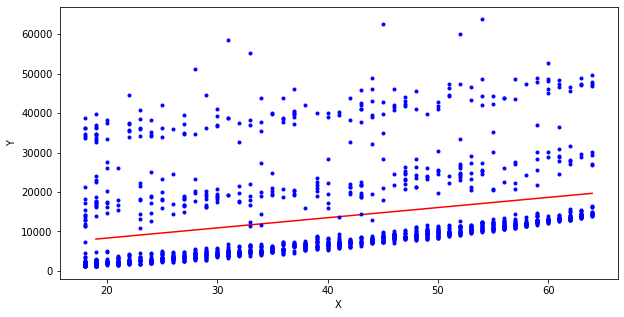

In [9]:
## 산점도 위에 회귀선을 그어 시각화
plt.figure(figsize=(10,5))
plt.plot(x_new, y_hat, '-r')
plt.plot(x, y, 'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### 경사 하강법
- 함수의 값이 낮아지는 방향으로 독립 변수의 값을 바꿔가면서 최종적으로 최소 함수값을 갖도록 하는 독립 변수값을 찾는 방식

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor

data= pd.read_csv('./data/insurance.csv')
x=np.array(data['age'])
y=np.array(data['charges'])
x=x.reshape(1338 ,1) 
# .reshape()으로 차원 맞추기
y=y.reshape(1338 ,1)
### max_iter : 훈련 데이터에 대한 최대 패스 수
sgd_reg =SGDRegressor(max_iter=1000, random_state=34)
sgd_reg.fit(x,y.ravel())

SGDRegressor(random_state=34)

In [14]:
print('SGD 회귀 모델 결과')
print('절편', sgd_reg.intercept_, '계수', sgd_reg.coef_)

SGD 회귀 모델 결과
절편 [9057.21833765] 계수 [484.13243757]


In [12]:
x_new=[[19],[64]]
y_hat=sgd_reg.predict(x_new)
print(y_hat)

[18255.73465154 40041.69434233]


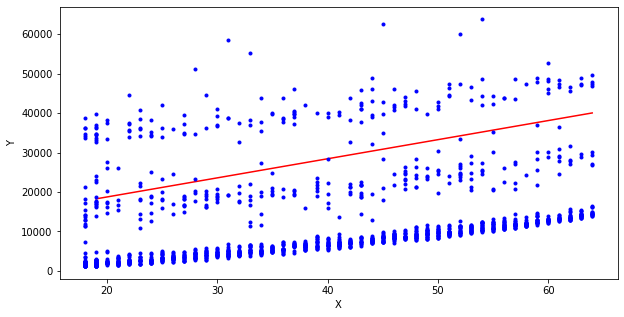

In [13]:
plt.figure(figsize=(10,5))
plt.plot(x_new, y_hat, '-r')
plt.plot(x, y, 'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()